In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# Read in csv file
train_master = pd.read_csv('./train_master.csv')
pd.options.display.max_columns = None

In [3]:
# sample and print the master training dataset
train_master = train_master.sample(n=100000)
train_master

,Unnamed: 0,msno,is_churn,city_churn_avg,registered_via_churn_avg,avg_payment_plan_days,avg_plan_list_price,avg_actual_amount_paid,pct_is_auto_renew,pct_is_cancel,total_transactions,is_cancel,is_auto_renew,pay_method_id_churn_avg,Unnamed: 0.1,total_num_unq,total_total_secs,daily_avg_num_25,daily_avg_num_50,daily_avg_num_75,daily_avg_num_985,daily_avg_num_100,daily_avg_num_unq,daily_avg_total_secs,tier
15304443,15304443,/IXsOxKGMdBDReIpiq2bwHpkyd7kC5AuQcil+ik85x4=,0,0.048411,0.030160,30.000000,148.210526,141.894737,1.000000,0.026316,38,1,38,0.031462,62319.0,1222.0,2.336340e+05,2.849624,0.473684,0.263158,0.338346,6.796992,9.187970,1756.646782,50_75
1410548,1410548,xL8+B7LzmMb4F18NTa+ipQQNWQ8UVvnp4HXTB7l9Khw=,0,0.088935,0.086362,21.818182,108.363636,149.000000,1.000000,0.000000,22,0,22,0.026189,2888857.0,1815.0,1.408970e+06,2.352201,1.314465,0.622642,0.591195,32.540881,11.415094,8861.444453,top_75
8282061,8282061,FJbshmdpBOvhk8l4YhWdw3YbFPSn85eTbYZgSVwPbsw=,0,0.086043,0.086362,28.761905,141.904762,149.000000,1.000000,0.047619,21,1,21,0.041923,814699.0,1020.0,3.231381e+05,3.424658,1.054795,0.643836,0.767123,16.671233,13.972603,4426.549753,50_75
9479927,9479927,pszd2IfdvAxq3r+gpqddSLcdyadvjtwFzO1REBDNqPE=,0,0.048411,0.030160,30.000000,99.000000,99.000000,1.000000,0.000000,18,0,18,0.031462,2537499.0,61.0,3.937526e+04,1.733333,0.133333,0.000000,0.200000,11.533333,4.066667,2625.017133,25_50
6724312,6724312,8PZsxw7kC5WmlnZdI74DxyTPQQHF8IVzi2lxNdU81mg=,0,0.078445,0.030160,30.000000,149.000000,149.000000,1.000000,0.000000,26,0,26,0.031462,490935.0,14002.0,4.000137e+06,2.660819,0.830409,0.461988,0.415205,93.760234,81.883041,23392.615520,top_75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580035,3580035,cs38v1oFVxEvo3A+vF1L8Scq4kpTtxgSEBf6aPL4Wdw=,0,0.100832,0.086362,22.173913,114.173913,153.043478,0.956522,0.086957,23,2,22,0.010315,1923847.0,5153.0,1.184203e+06,6.235043,2.807692,1.521368,1.132479,17.000000,22.021368,5060.694491,top_75
4472291,4472291,b9ioUm7E8xgtqueOJn7fORb0HaCSn7/rAC6HbW25PZg=,0,0.048411,0.086362,30.000000,149.000000,149.000000,0.000000,0.000000,13,0,0,0.196290,1844266.0,6821.0,2.062192e+06,12.705882,5.758170,3.516340,3.797386,47.111111,44.581699,13478.378850,top_75
5729414,5729414,Vn+c3043UCl99ig/jFKHNCipt0flb95q1L7zt1x4wCk=,0,0.048411,0.030160,28.846154,143.269231,149.000000,1.000000,0.000000,26,0,26,0.031462,1590673.0,25923.0,1.041413e+07,6.168627,1.125490,0.980392,1.078431,176.262745,101.658824,40839.737925,top_75
11398382,11398382,m63tQjWqqFWRCzzOQTJ5M5tHng7suxM1ZLBgppOu1cI=,0,0.078733,0.182558,30.000000,154.166667,154.166667,0.833333,0.000000,6,0,5,0.136358,2360187.0,1612.0,2.254820e+05,13.238095,3.158730,1.269841,1.365079,10.476190,25.587302,3579.078921,top_75


In [4]:
# drop duplicate index field
train_master = train_master.drop(labels=['Unnamed: 0'], axis=1)

train_master.columns

Index(['msno', 'is_churn', 'city_churn_avg', 'registered_via_churn_avg',
       'avg_payment_plan_days', 'avg_plan_list_price',
       'avg_actual_amount_paid', 'pct_is_auto_renew', 'pct_is_cancel',
       'total_transactions', 'is_cancel', 'is_auto_renew',
       'pay_method_id_churn_avg', 'Unnamed: 0.1', 'total_num_unq',
       'total_total_secs', 'daily_avg_num_25', 'daily_avg_num_50',
       'daily_avg_num_75', 'daily_avg_num_985', 'daily_avg_num_100',
       'daily_avg_num_unq', 'daily_avg_total_secs', 'tier'],
      dtype='object')

In [5]:
# Look at the information regarding its columns.
train_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 15304443 to 131559
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   msno                      100000 non-null  object 
 1   is_churn                  100000 non-null  int64  
 2   city_churn_avg            90036 non-null   float64
 3   registered_via_churn_avg  90036 non-null   float64
 4   avg_payment_plan_days     100000 non-null  float64
 5   avg_plan_list_price       100000 non-null  float64
 6   avg_actual_amount_paid    100000 non-null  float64
 7   pct_is_auto_renew         100000 non-null  float64
 8   pct_is_cancel             100000 non-null  float64
 9   total_transactions        100000 non-null  int64  
 10  is_cancel                 100000 non-null  int64  
 11  is_auto_renew             100000 non-null  int64  
 12  pay_method_id_churn_avg   100000 non-null  float64
 13  Unnamed: 0.1              86305 non-n

In [6]:
# This will show us records where `train_master['is_churn']` is null.
null_is_churn_mask = train_master['is_churn'].isnull()
train_master[null_is_churn_mask].head()

# no records without a churn record. Great.

,msno,is_churn,city_churn_avg,registered_via_churn_avg,avg_payment_plan_days,avg_plan_list_price,avg_actual_amount_paid,pct_is_auto_renew,pct_is_cancel,total_transactions,is_cancel,is_auto_renew,pay_method_id_churn_avg,Unnamed: 0.1,total_num_unq,total_total_secs,daily_avg_num_25,daily_avg_num_50,daily_avg_num_75,daily_avg_num_985,daily_avg_num_100,daily_avg_num_unq,daily_avg_total_secs,tier


In [7]:
# Calculate the mean fields by churn
train_master.groupby('is_churn').mean()

# in briefly scanning these averages, I can see there are some interesting things to dig into

,city_churn_avg,registered_via_churn_avg,avg_payment_plan_days,avg_plan_list_price,avg_actual_amount_paid,pct_is_auto_renew,pct_is_cancel,total_transactions,is_cancel,is_auto_renew,pay_method_id_churn_avg,Unnamed: 0.1,total_num_unq,total_total_secs,daily_avg_num_25,daily_avg_num_50,daily_avg_num_75,daily_avg_num_985,daily_avg_num_100,daily_avg_num_unq,daily_avg_total_secs
is_churn,,,,,,,,,,,,,,,,,,,,,
0,0.066797,0.060307,29.423108,130.132284,134.791762,0.936257,0.015907,20.393220,0.366401,19.381628,0.041349,1.508154e+06,4081.226754,2.289664e+11,5.729053,1.451835,0.888318,0.962258,25.895829,25.901078,9.195255e+08
1,0.070057,0.076369,34.367549,155.706092,157.819316,0.690219,0.055174,17.873793,0.953614,13.716741,0.080314,1.516638e+06,3578.570147,9.643765e+05,6.023806,1.563270,0.938258,1.022028,26.310175,26.356745,7.007491e+03


# Conduct EDA on aggregated features

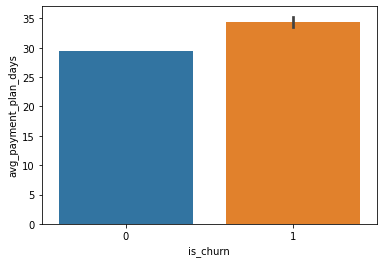

In [8]:
# plot the churn rate by avg_payment_plan_days
sns.barplot(data=train_master, x='is_churn', y='avg_payment_plan_days');

# results show that for churned orders avg_payment_plan_days tends to be higher

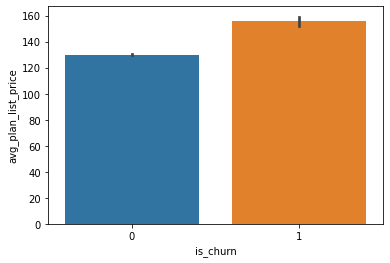

In [9]:
# plot the churn rate by avg_plan_list_price
sns.barplot(data=train_master, x='is_churn', y='avg_plan_list_price');

# results show that for churned orders avg_plan_list_price tends to be higher

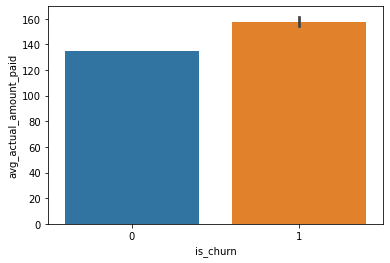

In [10]:
# plot the churn rate by avg_actual_amount_paid
sns.barplot(data=train_master, x='is_churn', y='avg_actual_amount_paid');

# results show that for churned orders avg_actual_amount_paid tends to be higher

In [11]:
from scipy.stats import pearsonr
corr, _ = pearsonr(train_master['avg_actual_amount_paid'], train_master['avg_plan_list_price'])
print('Pearsons correlation: %.3f' % corr)

# I'm going to omit this feature 'avg_actual_amount_paid' in the model because it's correlated with the above feature 'avg_plan_list_price'

Pearsons correlation: 0.964


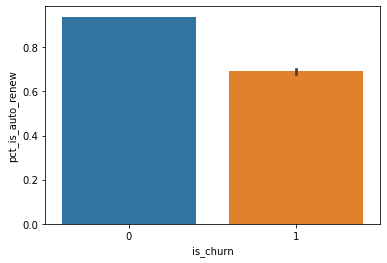

In [12]:
# plot the churn rate by pct_is_auto_renew
sns.barplot(data=train_master, x='is_churn', y='pct_is_auto_renew');

# results show that for churned orders pct_is_auto_renew tends to be much lower

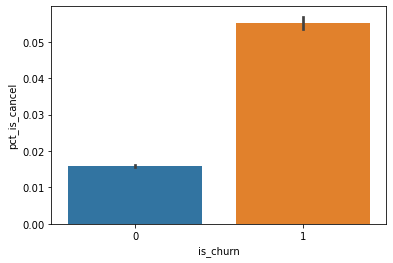

In [13]:
# plot the churn rate by pct_is_cancel
sns.barplot(data=train_master, x='is_churn', y='pct_is_cancel');

# results show that for churned orders pct_is_cancel tends to be higher

# drill down deeper. 
# load only a subset of the dataframe with random sampling
# check the competition site for measuring the model

In [28]:
mask = train_master['pct_is_cancel']<=0.015907

print (train_master[mask].groupby(['tier'])['is_churn'].mean())
print (train_master.groupby(['is_churn'])['pct_is_cancel'].mean())

tier
25_50        0.007777
50_75        0.020778
bottom_25    0.006112
top_75       0.023115
Name: is_churn, dtype: float64
is_churn
0    0.015907
1    0.055174
Name: pct_is_cancel, dtype: float64


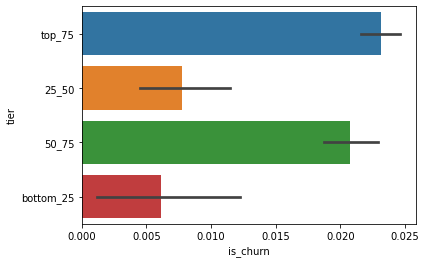

In [29]:
sns.barplot(data=train_master[mask], x='is_churn', y='tier');


In [40]:
train_master['high_cancel_high_usage'] = np.where((train_master['pct_is_cancel']<=0.015907) 
                                                  & (train_master['pct_is_cancel'] != '50_75') 
                                                  & (train_master['pct_is_cancel'] != 'top_75'), 1,0)

#df['hasimage'] = np.where(df['photos']!= '[]', True, False)


In [41]:
print (train_master.groupby(['tier'])['is_churn'].mean())

tier
25_50        0.044940
50_75        0.050017
bottom_25    0.047170
top_75       0.039348
Name: is_churn, dtype: float64


In [42]:
print (train_master.groupby(['tier','is_churn'])['pct_is_auto_renew'].mean())

tier       is_churn
25_50      0           0.991000
           1           0.853374
50_75      0           0.953085
           1           0.702429
bottom_25  0           0.998848
           1           0.921005
top_75     0           0.910898
           1           0.603548
Name: pct_is_auto_renew, dtype: float64


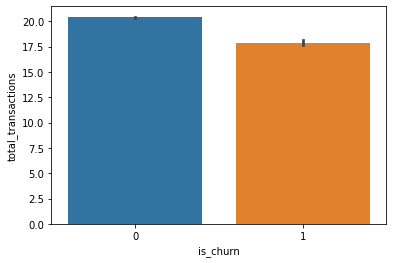

In [43]:
# plot the churn rate by total_transactions
sns.barplot(data=train_master, x='is_churn', y='total_transactions');

# results show that for churned orders total_transactions tends to be lower

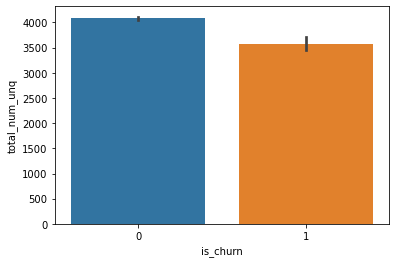

In [44]:
# plot the churn rate by total_num_unq
sns.barplot(data=train_master, x='is_churn', y='total_num_unq');

# results show that for churned orders total_num_unq tends to be lower

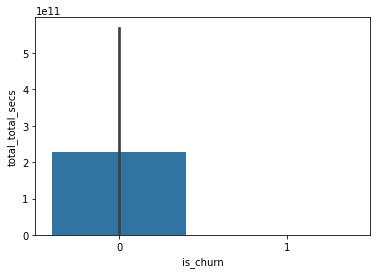

In [45]:
# plot the churn rate by total_total_secs
sns.barplot(data=train_master, x='is_churn', y='total_total_secs');

# these results look odd - need to investigate why there are negative seconds.
# edit: looks like removing the negative records fixed the issue.
# churn rate differs by seconds listened

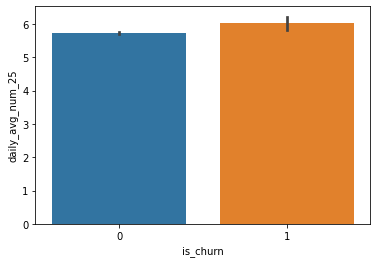

In [46]:
# plot the churn rate by daily_avg_num_25
sns.barplot(data=train_master, x='is_churn', y='daily_avg_num_25');

# results show that for churned orders daily_avg_num_25 tends to be higher, but only slightly

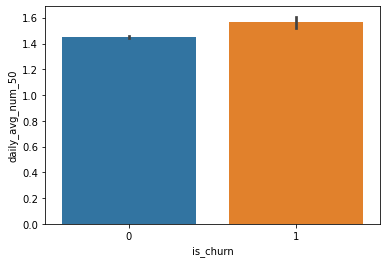

In [47]:
# plot the churn rate by daily_avg_num_50
sns.barplot(data=train_master, x='is_churn', y='daily_avg_num_50');

# results show that for churned orders daily_avg_num_50 tends to be higher

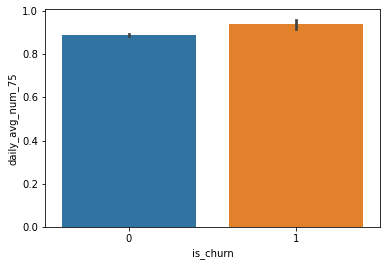

In [48]:
# plot the churn rate by daily_avg_num_75
sns.barplot(data=train_master, x='is_churn', y='daily_avg_num_75');

# results show that for churned orders daily_avg_num_75 tends to be higher

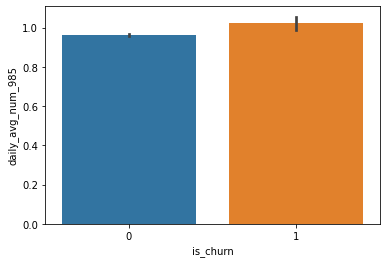

In [49]:
# plot the churn rate by daily_avg_num_985
sns.barplot(data=train_master, x='is_churn', y='daily_avg_num_985');

# results show that for churned orders daily_avg_num_985 tends to be higher

# for simplicity, I'm going to only use one of these daily average features for the model,
# as these features are highly correlated

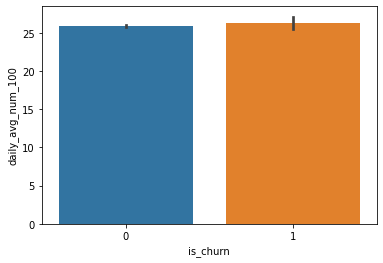

In [50]:
# plot the churn rate by daily_avg_num_100
sns.barplot(data=train_master, x='is_churn', y='daily_avg_num_100');

# results show that there are no differences in churn by the avg number of songs played 100%

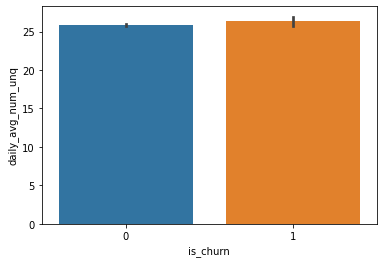

In [51]:
# plot the churn rate by daily_avg_num_unq
sns.barplot(data=train_master, x='is_churn', y='daily_avg_num_unq');

# results show that there are no material differences in churn by the daily_avg_num_unq

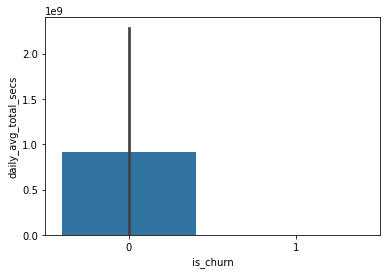

In [52]:
# plot the churn rate by daily_avg_total_secs
sns.barplot(data=train_master, x='is_churn', y='daily_avg_total_secs');

# these results look odd - need to investigate why there are negative seconds.

In [53]:
train_master.to_csv(path_or_buf='./train_master.csv')


In [54]:
train_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 15304443 to 131559
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   msno                      100000 non-null  object 
 1   is_churn                  100000 non-null  int64  
 2   city_churn_avg            90036 non-null   float64
 3   registered_via_churn_avg  90036 non-null   float64
 4   avg_payment_plan_days     100000 non-null  float64
 5   avg_plan_list_price       100000 non-null  float64
 6   avg_actual_amount_paid    100000 non-null  float64
 7   pct_is_auto_renew         100000 non-null  float64
 8   pct_is_cancel             100000 non-null  float64
 9   total_transactions        100000 non-null  int64  
 10  is_cancel                 100000 non-null  int64  
 11  is_auto_renew             100000 non-null  int64  
 12  pay_method_id_churn_avg   100000 non-null  float64
 13  Unnamed: 0.1              86305 non-n